In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('text', usetex=True)
plt.style.use('ggplot')
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
import pandas as pd
from sklearn.mixture import GaussianMixture
import os
from scipy.stats import norm, multivariate_normal, gamma, invgamma, multinomial, dirichlet, uniform, binom, invwishart
from tqdm import tqdm
import sys
from sklearn.mixture import GaussianMixture
os.chdir('../code')
from mv_gibbs import MvGibbsSampler as mv


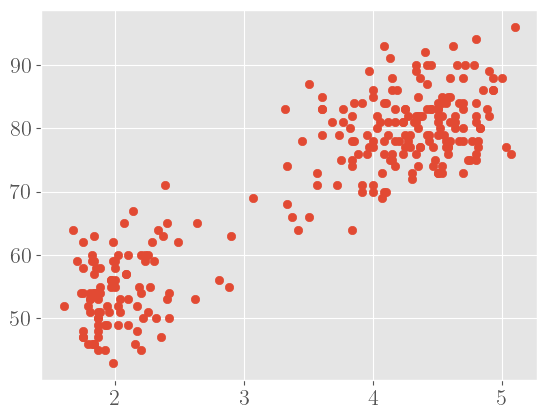

In [9]:
faithful = pd.read_csv('../../homework_4/data/faithful.csv')
X = faithful[['eruptions', 'waiting']].to_numpy()
plt.scatter(X[:, 0], X[:, 1])

In [10]:
def calculate_pdf(data, gs, n_points=100):
    x = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), n_points)
    y = np.linspace(np.min(data[:, 1]), np.max(data[:, 1]), n_points)
    xx, yy = np.meshgrid(x, y)
    xx, yy = xx.flatten(), yy.flatten()
    xy = np.vstack([xx, yy]).T
    pdfs = [gs.weights.mean(axis=0)[k] * multivariate_normal.pdf(xy, mean=gs.means.mean(axis=0)[k, :], cov=gs.covs.mean(axis=0)[k], allow_singular=True) for k in range(gs.k)]
    return x, y, np.sum(pdfs, axis=0)


In [11]:
x, y, pdf = calculate_pdf(X, gs, n_points=100)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 199/199 [00:02<00:00, 87.38it/s]


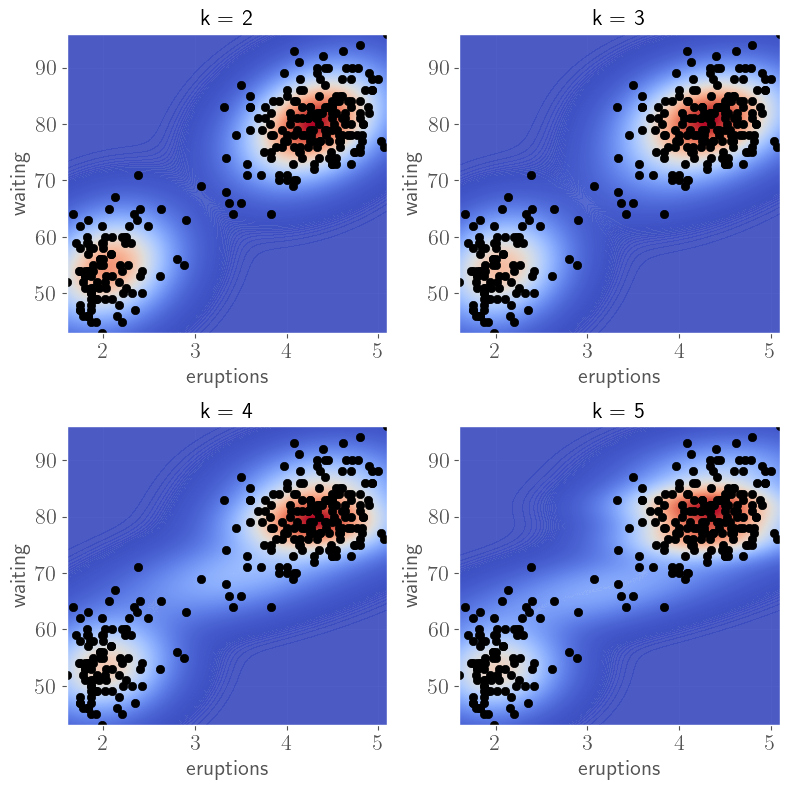

In [120]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()
ks = [2,3,4,5]
for i, k in enumerate(ks):
    gs = mv(X, n_it=1000, nu_0=k-1, Sig_0=1000, Psi_0=10, k=k, alpha=100, mu_0=0)
    gs.fit(n_burn=, n_thin=1)
    x, y, density = calculate_pdf(X, gs)
    #axes[i].scatter(gs.means.mean(axis=0)[:, 0], gs.means.mean(axis=0)[:, 1], s=500)
    density = density.reshape(100, 100)
    axes[i].contourf(x, y, density, cmap='coolwarm', levels=1000, alpha=.9)
    axes[i].scatter(faithful['eruptions'], faithful['waiting'], color='black')
    axes[i].set_xlabel('eruptions')
    axes[i].set_ylabel('waiting')
    axes[i].set_title(f'k = {k}')
fig.tight_layout()
plt.savefig('../figures/bivariate.png', dpi=300, bbox_inches='tight')

In [118]:
gs.means.mean(axis=0)

array([[ 2.62200594, 63.10919383],
       [ 4.32434636, 80.89075577],
       [ 4.20982301, 75.5640625 ],
       [ 1.99133485, 51.99220406],
       [ 4.38132155, 85.04129006]])

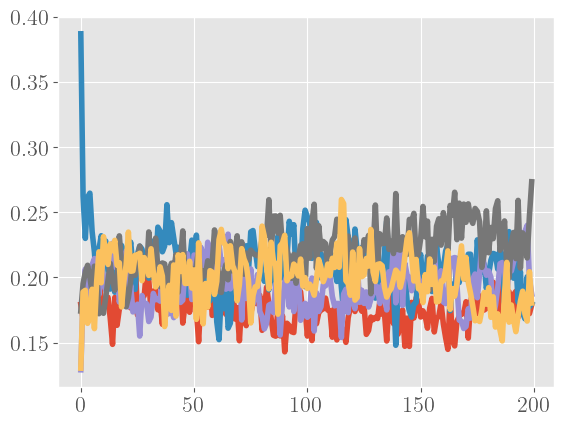

In [119]:
plt.plot(gs.weights)